In [1]:
import pandas as pd

In [2]:
assess = pd.read_csv('Property_Assessment__Customer_Service__-_Edmonton_Insight_Community.csv')
assess.head()

,ResponseDate,CompletionDate,Q1_Property,Q2_PropType,Q3_CityContact,Agreement_City staff treated me fairly and with respect.,Agreement_City staff were knowledgeable.,Agreement_City staff exceeded my expectations.,Agreement_City staff were responsive.,Agreement_I was able to get service without difficulty.,...,Q10_Own_Business (Source: Profiling Questionnaire 2014),Q11_Home_Language (Source: Profiling Questionnaire 2014),Q13_Volunteer (Source: Profiling Questionnaire 2014),Q14a_Primary_Transportation (Source: Profiling Questionnaire 2014),Q14b_Secondary_Transportation (Source: Profiling Questionnaire 2014),Q15_Household_Income (Source: Profiling Questionnaire 2014),Q16_Education (Source: Profiling Questionnaire 2014),Q17_City_Employee (Source: Profiling Questionnaire 2014),FSA (Source: Profiling Questionnaire 2014),Age_Rollup_Detailed (Source: Profiling Questionnaire 2014)
0,01/09/2018 11:50:00 PM,01/10/2018 12:09:00 AM,Yes,Residential property,I don't recall,NaN,NaN,NaN,NaN,NaN,...,No,English,Yes,Car/truck/Van as DRIVER,Walk,"$150,000 and over",College / technical school graduate,No,T6C,50-54
1,01/13/2018 02:56:00 AM,01/13/2018 03:36:00 AM,Yes,Residential property,I haven’t contacted the City,NaN,NaN,NaN,NaN,NaN,...,No,English,Yes,Car/truck/Van as DRIVER,Car/truck/van as PASSENGER,"$80,000 to $99,999",University undergraduate degree,No,T5Y,45-49
2,01/09/2018 07:13:00 PM,01/09/2018 07:20:00 PM,Yes,Residential property,Within the last three years,4 Somewhat agree,4 Somewhat agree,4 Somewhat agree,4 Somewhat agree,4 Somewhat agree,...,No,English,No,Car/truck/Van as DRIVER,Walk,"$80,000 to $99,999",College / technical school graduate,No,T5T,35-39
3,01/09/2018 06:59:00 PM,01/09/2018 07:06:00 PM,Yes,Residential property,Within the last three years,4 Somewhat agree,5 Strongly agree,4 Somewhat agree,3 Neither agree nor disagree,3 Neither agree nor disagree,...,Yes,English,No,Car/truck/Van as DRIVER,Bicycle,"$150,000 and over","Professional school graduate (e.g. medicine, d...",No,T6V,45-49
4,01/10/2018 05:13:00 AM,01/10/2018 05:29:00 AM,Yes,Residential property,I haven’t contacted the City,NaN,NaN,NaN,NaN,NaN,...,Yes,English,Yes,Car/truck/Van as DRIVER,Only have one mode of transportation,"$150,000 and over",College / technical school graduate,No,T6J,70-74


In [3]:
assess.Q3_CityContact.unique()

array(["I don't recall", 'I haven’t contacted the City',
       'Within the last three years', nan, 'Within the last year',
       'Within the last 6 months', 'Within the last 3 months'],
      dtype=object)

In [4]:
dfnull = assess[assess.Q3_CityContact.isnull()]

print('The number of null responces for City Contact is = {}'.format(len(dfnull)))

The number of null responces for City Contact is = 367


In [5]:
df_norecall = assess[assess.Q3_CityContact == "I don't recall"]

print('The number of no recall responces for City Contact is = {}'.format(len(df_norecall)))

The number of no recall responces for City Contact is = 157


In [6]:
df_nocontact = assess[assess.Q3_CityContact == "I haven’t contacted the City"]

print('The number of no contact responces for City Contact is = {}'.format(len(df_nocontact)))

The number of no contact responces for City Contact is = 1468


In [7]:
df_contact = assess[~assess.Q3_CityContact.isnull()]
df_contact = df_contact[~(df_contact.Q3_CityContact == "I don't recall")]
df_contact = df_contact[~(df_contact.Q3_CityContact == "I haven’t contacted the City")]

print('The number of contact responces for City Contact is = {}'.format(len(df_contact)))

The number of contact responces for City Contact is = 305


In [8]:
assign = df_contact['Q5_CommsAgreement_The City’s assessment team does a good job assigning property values']
fair = df_contact['Q5_CommsAgreement_The assessed value of my property is fair']
accurate = df_contact['Q5_CommsAgreement_The assessed value of my property is accurate']
info = df_contact['Q5_CommsAgreement_Overall, I’m satisfied with access to property assessment information']

assign = assign.sort_values()
fair = fair.sort_values()
accurate = accurate.sort_values()
info = info.sort_values()

In [9]:
dfnull2 = assign.isnull()
dfnull3 = fair.isnull()
dfnull4 = accurate.isnull()
dfnull5 = info.isnull()

print('The number of null responces for: \nThe City’s assessment team does a good job assigning property values is = \n{}'.format(len(dfnull2)))
print('\nThe number of null responces for: \nThe assessed value of my property is fair is = \n{}'.format(len(dfnull3)))
print('\nThe number of null responces for: \nThe assessed value of my property is accurate is = \n{}'.format(len(dfnull4)))
print('\nThe number of null responces for: \nOverall, I’m satisfied with access to property assessment information is = \n{}'.format(len(dfnull5)))

The number of null responces for: 
The City’s assessment team does a good job assigning property values is = 
305

The number of null responces for: 
The assessed value of my property is fair is = 
305

The number of null responces for: 
The assessed value of my property is accurate is = 
305

The number of null responces for: 
Overall, I’m satisfied with access to property assessment information is = 
305


In [10]:
# Remove the 305 null responses in the dataset
assign = assign[~assign.isnull()]
fair = fair[~fair.isnull()]
accurate = accurate[~accurate.isnull()]
info = info[~info.isnull()]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


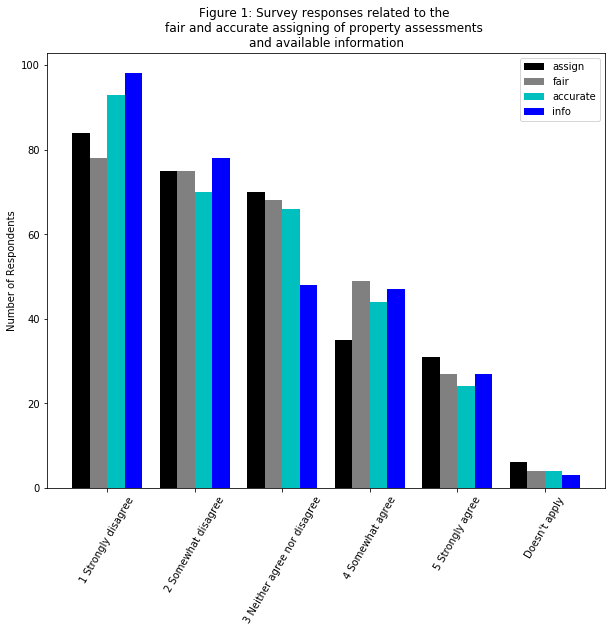

In [17]:
import matplotlib.pyplot as plt

labels = assign.unique()

def create_x(t, w, n, d):
    '''n is n dataset (out of t)
    t is Number of datasets
    d is Number of sets of bars
    w is Width of each bar'''
    
    return [t*x + w*n for x in range(d)]

plt.figure(figsize=(10,8))

store1_x = create_x(4, 0.8, 1, 6)
_ = plt.bar(store1_x, assign.value_counts().values, label='assign', color='k')

store2_x = create_x(4, 0.8, 2, 6)
_ = plt.bar(store2_x, fair.value_counts().values, label='fair', color='grey')

store3_x = create_x(4, 0.8, 3, 6)
_ = plt.bar(store3_x, accurate.value_counts().values, label='accurate', color='c')

store4_x = create_x(4, 0.8, 4, 6)
_ = plt.bar(store4_x, info.value_counts().values, label='info', color='b')

#create your ax object here
ax = plt.subplot()
middle_x = [(a + b + c + d) / 4.0 for a, b, c, d in zip(store1_x, store2_x, store3_x, store4_x)]
_ = ax.set_xticks(middle_x)
_ = ax.set_xticklabels(labels,rotation=60)

_ = plt.title('Figure 1: Survey responses related to the \nfair and accurate assigning of property assessments \nand available information')
_ = plt.ylabel('Number of Respondents')

_ = plt.legend()

plt.show()

# Figure 1 Analysis

The above graph visualizes the following survey questions:
- **assign**: The City’s assessment team does a good job assigning property values
- **fair**: The assessed value of my property is fair
- **accurate**: The assessed value of my property is accurate
- **info**: Overall, I’m satisfied with access to property assessment information

We can see from the responses that those respondents that took a negative position (strongly or somewhat disagree) significantly outnumber the respondents who took a positive position (somewhat or strongly agree). In the next section we will look at a hypothesis test to extend this to all Edmonton property owners.

**Null Hypothesis**: 1 in 10 or 10% of Edmonton property owners disagree with the accuracy of their property assessments

**Alternate Hypothesis**: > 10% disagree

**Significance Level**: 0.01

In [12]:
accurate.value_counts()

2 Somewhat disagree             93
3 Neither agree nor disagree    70
4 Somewhat agree                66
1 Strongly disagree             44
5 Strongly agree                24
Doesn't apply                    4
Name: Q5_CommsAgreement_The assessed value of my property is accurate, dtype: int64

In [13]:
sample_size = len(accurate)
sample_proportion = (93 + 44) / sample_size
sample_proportion

0.45514950166112955

In [14]:
import numpy as np

In [15]:
z = (sample_proportion - 0.1) / np.sqrt(0.1 * 0.9 / sample_size)

z

20.53871188419424

In [16]:
0.4415 / 0.01729

25.534991324465008

p-value ≈ 0

Therefore, we reject the null hypothesis and conclude that significantly more than 10% of Edmonton property owners do not find their property assessments accurate. 